In [13]:
from keras.datasets import imdb

In [14]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '') for i in train_data[1]])

decoded_review

" big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal  the hair is big lots of boobs  men wear those cut  shirts that show off their  sickening that men actually wore them and the music is just  trash that plays over and over again in almost every scene there is trashy music boobs and  taking away bodies and the gym still doesn't close for  all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [16]:
import numpy as np

def vectorize_data(input, dims = 10000):
    arr = np.zeros(shape=(len(input), dims))

    for i, seq in enumerate(input):
        arr[i, seq] = 1
    
    return arr

train_data = vectorize_data(train_data)
test_data = vectorize_data(test_data)

train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

In [17]:
from keras import layers, models

In [18]:
network = models.Sequential()

network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [19]:
from keras import optimizers

network.compile(optimizer= optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
val_data = train_data[:10000]
train_data = train_data[10000:]

val_labels = train_labels[:10000]
train_labels = train_labels[10000:]

In [21]:
history = network.fit(train_data, train_labels, batch_size=512, epochs=20, validation_data=(val_data, val_labels))

Epoch 1/20
30/30 [==============================] - 4s 85ms/step - loss: 0.5144 - accuracy: 0.7789 - val_loss: 0.3829 - val_accuracy: 0.8662
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3050 - accuracy: 0.9019 - val_loss: 0.3152 - val_accuracy: 0.8785
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2241 - accuracy: 0.9270 - val_loss: 0.2939 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1794 - accuracy: 0.9410 - val_loss: 0.2765 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1471 - accuracy: 0.9539 - val_loss: 0.2788 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1191 - accuracy: 0.9639 - val_loss: 0.3213 - val_accuracy: 0.8751
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0994 - accuracy: 0.9697 - val_loss: 0.3213 - val_accuracy: 0.8824
Epoch 8/20
30

In [22]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

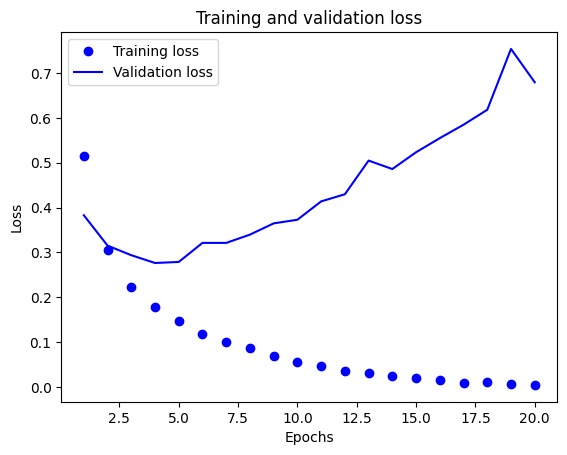

In [23]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

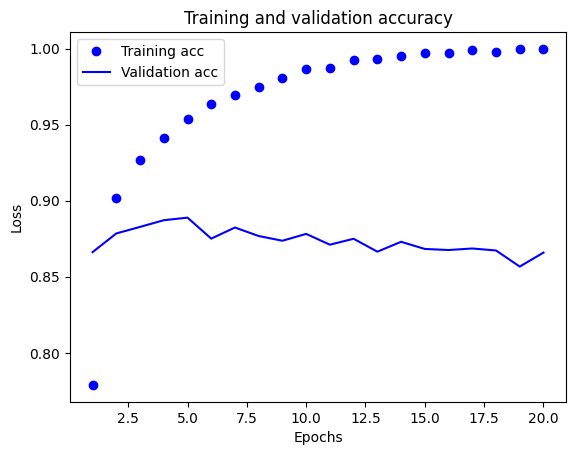

In [24]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
results = network.evaluate(test_data, test_labels)

results

782/782 [==============================] - 4s 2ms/step - loss: 0.7395 - accuracy: 0.8507


[0.7395055294036865, 0.8507199883460999]

## Training for 4 epochs to get the best output

In [29]:
network_2 = models.Sequential()

network_2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network_2.add(layers.Dense(16, activation='relu'))
network_2.add(layers.Dense(1, activation='sigmoid'))

network_2.compile(optimizer= optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history_2 = network_2.fit(train_data, train_labels, batch_size=512, epochs=4, validation_data=(val_data, val_labels))

Epoch 1/4
30/30 [==============================] - 6s 72ms/step - loss: 0.5056 - accuracy: 0.7833 - val_loss: 0.3856 - val_accuracy: 0.8687
Epoch 2/4
30/30 [==============================] - 1s 23ms/step - loss: 0.3055 - accuracy: 0.9016 - val_loss: 0.3084 - val_accuracy: 0.8841
Epoch 3/4
30/30 [==============================] - 1s 24ms/step - loss: 0.2269 - accuracy: 0.9253 - val_loss: 0.2788 - val_accuracy: 0.8906
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.1763 - accuracy: 0.9416 - val_loss: 0.2734 - val_accuracy: 0.8902


In [31]:
results_2 = network_2.evaluate(test_data, test_labels)

results_2

782/782 [==============================] - 2s 2ms/step - loss: 0.2915 - accuracy: 0.8832


[0.291495680809021, 0.8832399845123291]

## Using a single layer

In [32]:
network_3 = models.Sequential()

network_3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network_3.add(layers.Dense(1, activation='sigmoid'))

network_3.compile(optimizer= optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history_3 = network_3.fit(train_data, train_labels, batch_size=512, epochs=4, validation_data=(val_data, val_labels))

Epoch 1/4
30/30 [==============================] - 5s 63ms/step - loss: 0.4979 - accuracy: 0.7983 - val_loss: 0.4120 - val_accuracy: 0.8311
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.3124 - accuracy: 0.9034 - val_loss: 0.3253 - val_accuracy: 0.8771
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2433 - accuracy: 0.9243 - val_loss: 0.2884 - val_accuracy: 0.8912
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.1994 - accuracy: 0.9399 - val_loss: 0.2761 - val_accuracy: 0.8923


In [34]:
results_3 = network_3.evaluate(test_data, test_labels)

results_3

782/782 [==============================] - 2s 2ms/step - loss: 0.2925 - accuracy: 0.8840


[0.2924535274505615, 0.8839600086212158]

## Using 3 layers


In [35]:
network_4 = models.Sequential()

network_4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network_4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network_4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network_4.add(layers.Dense(1, activation='sigmoid'))

network_4.compile(optimizer= optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history_4 = network_4.fit(train_data, train_labels, batch_size=512, epochs=4, validation_data=(val_data, val_labels))

Epoch 1/4
30/30 [==============================] - 3s 55ms/step - loss: 0.5092 - accuracy: 0.7873 - val_loss: 0.3614 - val_accuracy: 0.8763
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.2901 - accuracy: 0.9025 - val_loss: 0.3049 - val_accuracy: 0.8810
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2032 - accuracy: 0.9316 - val_loss: 0.2845 - val_accuracy: 0.8850
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.1620 - accuracy: 0.9432 - val_loss: 0.3055 - val_accuracy: 0.8812


In [38]:
results_4 = network_4.evaluate(test_data, test_labels)

results_4

782/782 [==============================] - 2s 2ms/step - loss: 0.3227 - accuracy: 0.8717


[0.3227297365665436, 0.8716800212860107]

## Using 32 nodes

In [45]:
network_5 = models.Sequential()

network_5.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
network_5.add(layers.Dense(32, activation='relu'))
network_5.add(layers.Dense(1, activation='sigmoid'))

network_5.compile(optimizer= optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
history_5 = network_5.fit(train_data, train_labels, batch_size=512, epochs=5, validation_data=(val_data, val_labels))

Epoch 1/5
30/30 [==============================] - 4s 45ms/step - loss: 0.4709 - accuracy: 0.8021 - val_loss: 0.4078 - val_accuracy: 0.8247
Epoch 2/5
30/30 [==============================] - 1s 23ms/step - loss: 0.2733 - accuracy: 0.9013 - val_loss: 0.3030 - val_accuracy: 0.8774
Epoch 3/5
30/30 [==============================] - 1s 23ms/step - loss: 0.1968 - accuracy: 0.9335 - val_loss: 0.2764 - val_accuracy: 0.8902
Epoch 4/5
30/30 [==============================] - 1s 24ms/step - loss: 0.1538 - accuracy: 0.9481 - val_loss: 0.2859 - val_accuracy: 0.8875
Epoch 5/5
30/30 [==============================] - 1s 22ms/step - loss: 0.1271 - accuracy: 0.9577 - val_loss: 0.3016 - val_accuracy: 0.8825


In [47]:
results_5 = network_5.evaluate(test_data, test_labels)

results_5

782/782 [==============================] - 2s 2ms/step - loss: 0.3315 - accuracy: 0.8732


[0.3314773440361023, 0.873199999332428]